In [ ]:
!pip install nba_api

# Data Collection

In [ ]:
from nba_api.stats.static import teams
import pandas as pd
nba_teams = teams.get_teams()

nba_teams = pd.DataFrame(data = nba_teams,columns = ['id'])
nba_teams = nba_teams['id'].tolist()

"""teams = pd.DataFrame(data=nba_teams, columns=['abbreviation'])
teams = teams['abbreviation'].tolist()"""

print (nba_teams)

#team_name = input("Enter the abbreviation of a team in the game you want to know about: ")

#game_team = [team for team in nba_teams if team['abbreviation'] == team_name][0]
#team_id = game_team['id']
#print(f'{game_team}: {team_id}')

[1610612737, 1610612738, 1610612739, 1610612740, 1610612741, 1610612742, 1610612743, 1610612744, 1610612745, 1610612746, 1610612747, 1610612748, 1610612749, 1610612750, 1610612751, 1610612752, 1610612753, 1610612754, 1610612755, 1610612756, 1610612757, 1610612758, 1610612759, 1610612760, 1610612761, 1610612762, 1610612763, 1610612764, 1610612765, 1610612766]


In [ ]:
from nba_api.stats.endpoints import leaguegamefinder
from nba_api.stats.library.parameters import Season
from nba_api.stats.library.parameters import SeasonType

data = []

for id in nba_teams:
    gamefinder = leaguegamefinder.LeagueGameFinder(team_id_nullable=id, season_nullable=Season.default,season_type_nullable=SeasonType.regular)
    game_finder = gamefinder.get_data_frames()[0]

    data.append(game_finder)



In [ ]:
print(type(data))

<class 'list'>


In [ ]:
# prompt: convert the list of data frames into a single data frame

combined_df = pd.concat(data)


In [ ]:
print(type(combined_df))

<class 'pandas.core.frame.DataFrame'>


In [ ]:
print(combined_df.info)

data2 = combined_df

data1 = combined_df['GAME_ID']

data1 = data1.unique()

print(data1)

print(type(data1))

<bound method DataFrame.info of    SEASON_ID     TEAM_ID TEAM_ABBREVIATION          TEAM_NAME     GAME_ID  \
0      22023  1610612737               ATL      Atlanta Hawks  0022301188   
1      22023  1610612737               ATL      Atlanta Hawks  0022301178   
2      22023  1610612737               ATL      Atlanta Hawks  0022301159   
3      22023  1610612737               ATL      Atlanta Hawks  0022301147   
4      22023  1610612737               ATL      Atlanta Hawks  0022301130   
..       ...         ...               ...                ...         ...   
77     22023  1610612766               CHA  Charlotte Hornets  0022300133   
78     22023  1610612766               CHA  Charlotte Hornets  0022300122   
79     22023  1610612766               CHA  Charlotte Hornets  0022300101   
80     22023  1610612766               CHA  Charlotte Hornets  0022300077   
81     22023  1610612766               CHA  Charlotte Hornets  0022300063   

     GAME_DATE      MATCHUP WL  MIN  PTS  .

In [ ]:
gameids = data1[:615].tolist()
gameids1 = data1[616:1230].tolist()





# Play By Play Data Collection

  ## Feature Engineering
  ## Preprocessing

In [ ]:
import pandas as pd
import numpy as np

# Query for the play by play of that most recent regular season game
from nba_api.stats.endpoints import playbyplay

for i in gameids:
  df0 = playbyplay.PlayByPlay(i).get_data_frames()[0]
  df0[['VSTRSCORE', 'HOMESCORE']] = df0['SCORE'].str.split(' - ', expand=True)
  # Convert 'SCOREMARGIN' column to numeric type
  df0[['minutes', 'seconds']] = df0['PCTIMESTRING'].str.split(':', expand=True)
  # Step 2: Convert Minutes and Seconds to Seconds
  df0['SECONDS'] = df0['minutes'].astype(int) * 60 + df0['seconds'].astype(int)
  df = pd.DataFrame(data=df0, columns=['GAME_ID','EVENTNUM', 'EVENTMSGTYPE', 'EVENTMSGACTIONTYPE','PERIOD','SECONDS','VSTRSCORE','HOMESCORE','SCOREMARGIN'])



#df0 = playbyplay.PlayByPlay(game_id).get_data_frames()[0]
#df0[['VSTRSCORE', 'HOMESCORE']] = df0['SCORE'].str.split(' - ', expand=True)
#df = pd.DataFrame(data=df0, columns=['EVENTNUM', 'EVENTMSGTYPE', 'EVENTMSGACTIONTYPE','HOMEDESCRIPTION','VISITORDESCRIPTION','VSTRSCORE','HOMESCORE','SCOREMARGIN'])
#df.head(50) #just looking at the head of the data


In [ ]:
from nba_api.stats.endpoints import playbyplay

for i in gameids1:
  df01 = playbyplay.PlayByPlay(i).get_data_frames()[0]
  df01[['VSTRSCORE', 'HOMESCORE']] = df01['SCORE'].str.split(' - ', expand=True)
  df01[['minutes', 'seconds']] = df01['PCTIMESTRING'].str.split(':', expand=True)
  # Step 2: Convert Minutes and Seconds to Seconds
  df01['SECONDS'] = df01['minutes'].astype(int) * 60 + df01['seconds'].astype(int)
  df1 = pd.DataFrame(data=df01, columns=['GAME_ID','EVENTNUM', 'EVENTMSGTYPE', 'EVENTMSGACTIONTYPE','PERIOD','SECONDS','VSTRSCORE','HOMESCORE','SCOREMARGIN'])



In [ ]:
pbpdata = pd.concat([df,df1])

print(pbpdata)

        GAME_ID  EVENTNUM  EVENTMSGTYPE  EVENTMSGACTIONTYPE  PERIOD  SECONDS  \
0    0022300598         2            12                   0       1      720   
1    0022300598         4            10                   0       1      720   
2    0022300598         7             2                   1       1      700   
3    0022300598         8             4                   0       1      697   
4    0022300598         9             2                   3       1      695   
..          ...       ...           ...                 ...     ...      ...   
523  0022300077       756             8                   0       4       22   
524  0022300077       758             3                  18       4       22   
525  0022300077       759             4                   1       4       22   
526  0022300077       760             3                  19       4       22   
527  0022300077       761            13                   0       4        0   

    VSTRSCORE HOMESCORE SCOREMARGIN  
0

In [ ]:
pbpdata['SCOREMARGIN'].isnull().sum()

824

In [ ]:
fill = ['SCOREMARGIN','VSTRSCORE','HOMESCORE']

for col in fill:
    pbpdata[col] = pbpdata[col].ffill()
    pbpdata[col].fillna(0, inplace=True)


#pbpdata['SCOREMARGIN'].fillna(method='ffill', inplace=True)
#pbpdata['SCOREMARGIN','VSTRSCORE','HOMESCORE'].fillna(0, inplace=True)
pbpdata['SCOREMARGIN'].replace('TIE', method = 'ffill', inplace=True)

print(pbpdata)

        GAME_ID  EVENTNUM  EVENTMSGTYPE  EVENTMSGACTIONTYPE  PERIOD  SECONDS  \
0    0022300598         2            12                   0       1      720   
1    0022300598         4            10                   0       1      720   
2    0022300598         7             2                   1       1      700   
3    0022300598         8             4                   0       1      697   
4    0022300598         9             2                   3       1      695   
..          ...       ...           ...                 ...     ...      ...   
523  0022300077       756             8                   0       4       22   
524  0022300077       758             3                  18       4       22   
525  0022300077       759             4                   1       4       22   
526  0022300077       760             3                  19       4       22   
527  0022300077       761            13                   0       4        0   

    VSTRSCORE HOMESCORE SCOREMARGIN  
0

In [ ]:
import pandas as pd

# Assume df is your dataframe and it has columns 'game_id', 'Eventnum', and 'ScoreMargin'

# Define a lambda function to get the maximum Eventnum and corresponding ScoreMargin value for each group
get_max_eventnum_scoremargin = lambda x: x.loc[x['EVENTNUM'].idxmax(), 'SCOREMARGIN']

# Group by game_id and apply the lambda function to each group
result = pbpdata.groupby('GAME_ID').apply(get_max_eventnum_scoremargin)

print(result)
print(type(result))
"""# Reset the index and convert the result to a list
result = result.reset_index(drop=True).tolist()

print(result)"""

GAME_ID
0022300077    -3
0022300598     1
dtype: object
<class 'pandas.core.series.Series'>


'# Reset the index and convert the result to a list\nresult = result.reset_index(drop=True).tolist()\n\nprint(result)'

In [ ]:
# Assuming df1 and df2 are your DataFrames

pbpdata = pd.merge(pbpdata, data2[['GAME_ID', 'WL']], on='GAME_ID', how='left')

pd.set_option('display.max_rows', None)

print(pbpdata)

In [ ]:
pbpdata.isnull().sum()

GAME_ID               0
EVENTNUM              0
EVENTMSGTYPE          0
EVENTMSGACTIONTYPE    0
PERIOD                0
SECONDS               0
VSTRSCORE             0
HOMESCORE             0
SCOREMARGIN           0
WL                    0
dtype: int64

In [ ]:
pd.DataFrame.to_csv(pbpdata, 'pbp2024.csv', sep=',', na_rep='.', index=False)

# Data Modelling

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load the data into a DataFrame
trainset = pd.read_csv('/content/pbp2024.csv')

# Extract features and target
X = trainset[['EVENTNUM', 'EVENTMSGTYPE', 'EVENTMSGACTIONTYPE', 'PERIOD', 'SECONDS', 'VSTRSCORE', 'HOMESCORE']]
y = trainset['SCOREMARGIN']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape the data for LSTM input shape [samples, timesteps, features]
X_train = np.array(X_train).reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = np.array(X_test).reshape(X_test.shape[0], 1, X_test.shape[1])

# Define the LSTM model
model = Sequential()
model.add(LSTM(units=50, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")

# Predictions
y_pred = model.predict(X_test)




Epoch 1/100
75/75 [==============================] - 2s 2ms/step - loss: 144.6596
Epoch 2/100
75/75 [==============================] - 0s 2ms/step - loss: 139.0436
Epoch 3/100
75/75 [==============================] - 0s 2ms/step - loss: 132.7532
Epoch 4/100
75/75 [==============================] - 0s 3ms/step - loss: 125.5723
Epoch 5/100
75/75 [==============================] - 0s 2ms/step - loss: 118.2749
Epoch 6/100
75/75 [==============================] - 0s 2ms/step - loss: 110.9648
Epoch 7/100
75/75 [==============================] - 0s 2ms/step - loss: 102.0885
Epoch 8/100
75/75 [==============================] - 0s 2ms/step - loss: 93.6113
Epoch 9/100
75/75 [==============================] - 0s 4ms/step - loss: 86.4527
Epoch 10/100
75/75 [==============================] - 0s 4ms/step - loss: 79.1936
Epoch 11/100
75/75 [==============================] - 0s 3ms/step - loss: 70.4414
Epoch 12/100
75/75 [==============================] - 0s 3ms/step - loss: 55.5820
Epoch 13/100
75/75

In [ ]:
# prompt: print model summary

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50)                11600     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 11651 (45.51 KB)
Trainable params: 11651 (45.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import numpy as np

# prompt: print the model accuracy

import numpy as np
print(f"Accuracy: {accuracy_score(y_test, np.round(y_pred))}")


Accuracy: 0.43025210084033616


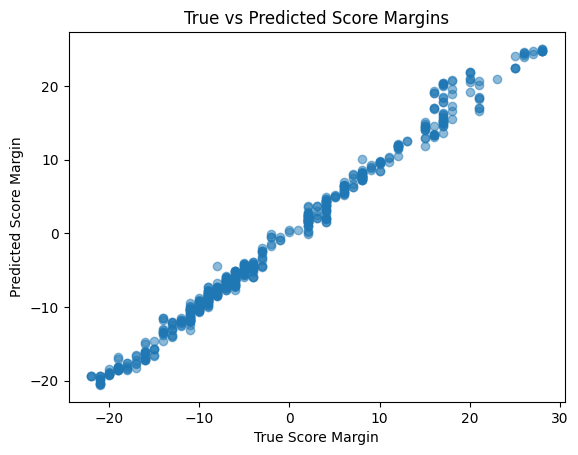

In [ ]:
import matplotlib.pyplot as plt

# Plotting the scatter plot
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('True Score Margin')
plt.ylabel('Predicted Score Margin')
plt.title('True vs Predicted Score Margins')
plt.show()


In [ ]:
print(f"Type of y_pred_direction: {type(y_pred)}")
print(f"Type of y_test_direction: {type(y_test)}")

Type of y_pred_direction: <class 'numpy.ndarray'>
Type of y_test_direction: <class 'pandas.core.series.Series'>


In [ ]:
print(f"Shape of y_pred_direction: {y_pred.shape}")
print(f"Shape of y_test_direction: {y_test.shape}")

Shape of y_pred_direction: (595,)
Shape of y_test_direction: (595,)
